# Non-linear equations: introduction

This notebook is based on Chapter 1 of 

<a id='thebook'></a>

> Süli, Endre and Mayers, David F. _An introduction to numerical analysis_. Cambridge University Press, Cambridge, 2003. <https://doi.org/10.1017/CBO9780511801181> (ebook in [Helka](https://helka.helsinki.fi/permalink/358UOH_INST/1h3k2rg/alma9926836783506253)) 

In addition, some examples are taken from Chapters 1 and 2 of 

> Scott, L. Ridgway. _Numerical analysis_. Princeton University Press, Princeton, NJ, 2011.

The equation $x^2 = 2$ has two solutions $x = \pm \sqrt{2}$, but how do we compute an approximation to $\sqrt{2}$ as a floating-point number?

This problem has a long tradition, see the Babylonian clay tablet [YBC 7289](https://en.wikipedia.org/wiki/YBC_7289). 
Perhaps the first algorithm used for approximating $\sqrt{q}$, with $q > 0$, is the [Babylonian method](https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Babylonian_method):

1. Start with an initial guess $x_0$
2. Set 
$$
x_{n+1} = \frac 1 2 (x_n + \frac q {x_n})
$$
3. Repeat step 2 until the desired accuracy is achieved

In [ ]:
def babylonian_method(x, q):
    return 0.5*(x + q/x)

In [ ]:
import numpy as np
max_steps = 5
xs = np.zeros(max_steps)
x = 1.5
for n in range(max_steps):
    x = babylonian_method(x, 2)
    xs[n] = x
xs

In [ ]:
xtrue = np.sqrt(2)
errs = np.abs(xs - xtrue)

import pandas as pd
df = pd.DataFrame({
    'x': xs, 
    'error': errs, 
    })
df.index = range(1, max_steps+1)
df.index.name = 'n'
df.style.format({'error': '{:.1e}'})

# Fixed-point iteration

The Babylonian method is a fixed point iteration of the form

$$
x_{n+1} = f(x_n), \qquad n=0,1,\dots
$$

If the sequence $x_n$ converges to a point $\xi$ and $f$ is continuous, then $\xi$ is a fixed point of $f$, that is, $\xi = f(\xi)$. Indeed 

$$
\xi = \lim_{n \to \infty} x_{n+1} = \lim_{n \to \infty} f(x_n) = f(\xi).
$$

Note that while the Gaussian elimination terminates after a finite number of steps, a fixed point iteration may require infinite number of steps to converge.

In the case of the Babylonian method

$$
f(x) = \frac 1 2 (x + \frac q {x})
$$

and 
$$
\xi = f(\xi)
\quad\iff\quad
\xi = \frac q {\xi}
\quad\iff\quad
\xi^2 = q
\quad\iff\quad
\xi = \pm \sqrt{q}.
$$

One may wonder if the simpler choice $f(x) = \frac q {x}$ would work as well.
After all $\xi = f(\xi)$ is equivalent to $\xi = \pm \sqrt{q}$ also for this $f$.

In [ ]:
def non_method(x, q):
    return q / x

max_steps = 5
xs = np.zeros(max_steps)
x = 1.5 # initial guess 
for n in range(max_steps):
    x = non_method(x, 2)
    xs[n] = x
xs

Consider a closed interval $I = [a,b]$ with $a < b$.
A function $f : I \to \mathbb R$ is a _contraction_ if there is $0 < L < 1$ such that 

\begin{equation}\tag{1}
|f(x) - f(y)| \le L |x - y|, \qquad x,y \in I.
\end{equation}

The [mean value theorem](https://en.wikipedia.org/wiki/Mean_value_theorem) implies that (1) holds with $L = \max_{x \in I} |f'(x)|$ whenever $f$ is differentiable.

$L$ is also called the _Lipschitz constant_ of $f$ (on the interval $I$).

<div style="padding:25px; border: 2px solid gray;">

## Theorem: Banach fixed-point

Suppose that $f : I \to I$ is a contraction. Then there is a unique fixed point $\xi \in I$ of $f$, and the sequence $x_{n+1} = f(x_{n})$ converges to $\xi$ for any initial guess $x_0 \in I$.
</div>


For a proof, see Theorem 1.3 of [the book](#thebook). 

<div style="padding:25px; border: 2px solid gray;">

## Theorem: local convergence

Let $\xi$ be a fixed point of $f : \mathbb R \to \mathbb R$ and suppose that $f$ is continuously differentiable near $\xi$. If $|f'(\xi)| < 1$, then there is an open interval $I$ containing $\xi$ such that the sequence $x_{n+1} = f(x_{n})$ converges to $\xi$ for any initial guess $x_0 \in I$.
</div>

_Proof_. The continuity of $f'$ near $\xi$, together with $|f'(\xi)| < 1$, implies that there are $\epsilon > 0$ and $0 <\delta < 1$ such that 

$$
|f'(x)| \le \delta, \qquad x \in (\xi - \epsilon, \xi + \epsilon) =: I.
$$

The mean value theorem implies 

$$
|f(x) - f(y)| \le L |x - y|, \qquad x,y \in I,
$$

with $L = \delta$. In particular, 

$$
|f(x) - \xi| = |f(x) - f(\xi)| \le \delta |x - \xi| < \delta \epsilon < \epsilon, \qquad x \in I.
$$

Hence $f$ maps $I$ to itself and we can apply the Banach fixed-point theorem. $\blacksquare$

In the case of the Babylonian method

$$
f(x) = \frac 1 2 (x + \frac q {x}) 
\quad \text{and} \quad
f'(x) = \frac 1 2 (1 - \frac q {x^2}).
$$

Thus $f'(\xi) = 0$ at the fixed point $\xi = \sqrt{q}$,
and the method converges locally (that is, for an initial guess near $\xi$).

In [ ]:
# Poor initial guess
max_steps = 15
xs = np.zeros(max_steps)
x = 0.01
for n in range(max_steps):
    x = babylonian_method(x, 2)
    xs[n] = x
xs


On the other hand, in the case of the "non-method"

$$
f(x) = \frac q {x},
\quad \text{and} \quad
f'(x) = - \frac q {x^2}.
$$

Thus $f'(\xi) = -1$ at $\xi = \sqrt{q}$,
and $f$ is **not** a contraction on any open interval containing $\xi$.


<div style="padding:25px; border: 2px solid gray;">

## Definition: order of convergence

Suppose that a sequence $x_n$ converges to $\xi$ in $\mathbb R$.
If there are $p > 1$ and $\mu > 0$ such that 
\begin{align}
\tag{1}
\lim_{n \to \infty} \frac{|x_{n+1} - \xi|}{|x_{n} - \xi|^p} = \mu,
\end{align}

then $x_n$ is said to converge with order $p$.
If (1) holds with $p = 1$ and $0 < \mu < 1$,
then $x_n$ is said to converge linearly.
Finally, if (1) holds with $p = 1$ and $\mu = 1$,
then $x_n$ is said to converge sublinearly.
</div>

## Example: different orders of convergence

Let $\lambda \in (0,1)$. Then

* sequence $x_n = \lambda^n$ converges linearly to zero,
* sequence $x_n = \lambda^{2^n}$ converges quadratically (that is, with order 2) to zero,
* sequence $x_n = 1/n$ converges sublinearly to zero,
* sequence $x_n = \lambda^{n!}$ converges superpolynomially to zero in the sense that for all $p > 1$

$$
\frac{x_{n+1}}{x_n^p} \to 0.
$$

In [ ]:
from matplotlib import pyplot as plt

lam = 0.5
def x(n):
    return lam**n

N = 10
ns = np.arange(1, N+1)
plt.semilogy(ns, x(ns));


### Big-$\mathcal{O}$ notation

There is a different measure on the order of convergence denoted with the big-$\mathcal{O}$ notation. We write (for $y_n > 0$)
$$ x_n = \mathcal{O}(y_n) \ \text{as} \ n \to \infty, $$
if $\exists C > 0$ and $n_0 > 0$ such that $\forall n \geq n_0: \quad |x_n| \leq C y_n.$

Similarly we could write for functions $f(x)$ and $0 < g(x)$ that
$$ f(x) = \mathcal{O}(g(x)) \ \text{as} \ x \to a,$$
if $\exists C > 0$ and $\delta > 0$ such that $\forall |x - a| < \delta: \quad |f(x)| \leq C g(x).$

More info availabe for example in these [lecture notes](https://services.math.duke.edu/~holee/math361-2020/lectures/Lec-general.pdf) from the Duke University (rest of the lecture notes are also good!):
> Wong, Jeffrey & Lee, Holden. _Math 361S Lecture Notes: Some background and theorems_

### Example: $x_n = \lambda^n$

For $0 < \lambda < 1$ the sequence $x_n = \lambda^n$ converges linearly to 0, but also
$$ \lambda^n = \mathcal{O}(\alpha^n), \ \forall \alpha \geq \lambda.$$

### Example: cosine = $1 - x^2$ "plus lower order terms"

Consider the interval $|x| \leq 1$. There we could write
$$ \cos(x) = 1 - \frac{x^2}{2} + \mathcal{O}(x^4),$$
since using the Taylor series of cosine we have
$$
\cos(x) - \left(1 - \frac{x^2}{2}\right) = \sum_{n=0}^\infty \frac{(-1)^{n}}{(2n)!}x^{2n} - \left(1 - \frac{x^2}{2}\right) \\
= \sum_{n=2}^\infty \frac{(-1)^{n}}{(2n)!}x^{2n} \\
\leq \sum_{n=2}^\infty \frac{1}{(2n)!}x^{2n} \\
\leq 2 \frac{1}{4!}x^{4},
$$
i.e. $\cos(x) - 1 + \frac{x^2}{2} = \mathcal{O}(x^4)$ as desired.

<div style="padding:25px; border: 2px solid gray;">

## Theorem: local _linear_ convergence

Let $f$, $\xi$ and $I$ be as in the local convergence theorem. 
Suppose that $f'(\xi) \ne 0$. Then the sequence $x_{n+1} = f(x_{n})$ converges linearly to $\xi$ for any initial guess $x_0 \in I$.
</div>

_Proof_. The _local convergence_ theorem implies that $x_n \to \xi$. The mean value theorem implies that there is $\tilde x_n$ between $\xi$ and $x_n$ such that 

$$
f(x_n) - f(\xi) = f'(\tilde x_n)(x_n - \xi). 
$$

As $x_n \to \xi$, also $\tilde x_n \to \xi$. Recalling that $f'$ is continuous near $\xi$, we have

$$
\frac{|x_{n+1} - \xi|}{|x_{n} - \xi|}
= 
\frac{|f(x_n) - f(\xi)|}{|x_{n} - \xi|}
= 
|f'(\tilde x_n)| \to |f'(\xi)| =: \mu.
$$

To conclude, we observe that $0 < \mu < 1$.
$\blacksquare$

<div style="padding:25px; border: 2px solid gray;">

## Theorem: local _higher-order_ convergence

Let $f$, $\xi$ and $I$ be as in the local convergence theorem. 
Suppose that $f$ has continuous derivatives up to order $p \ge 2$ near $\xi$,
and that $f'(\xi) = \dots = f^{(p - 1)}(\xi) = 0$
and $f^{(p)}(\xi) \ne 0$. Then the sequence $x_{n+1} = f(x_{n})$ converges with order $p$ to $\xi$ for any initial guess $x_0 \in I$.
</div>

_Proof_. The _local convergence_ theorem implies that $x_n \to \xi$. 
[Taylor's theorem](https://en.wikipedia.org/wiki/Taylor's_theorem#Explicit_formulas_for_the_remainder), with Lagrange form of the remainder, says that there is $\tilde x_n$ between $\xi$ and $x_n$ such that 

$$
f(x_n) - f(\xi) = \frac{f^{(p)}(\tilde x_n)}{p!}(x_n - \xi)^p. 
$$

As $x_n \to \xi$, also $\tilde x_n \to \xi$. Recalling that $f^{(p)}$ is continuous near $\xi$, we have

$$
\frac{|x_{n+1} - \xi|}{|x_{n} - \xi|^p}
= 
\frac{|f(x_n) - f(\xi)|}{|x_{n} - \xi|^p}
= 
\frac{|f^{(p)}(\tilde x_n)|}{p!} \to \frac{|f^{(p)}(\xi)|}{p!} \ne 0.
$$
$\blacksquare$

# Relaxation and Newton's method

The problem to solve $\phi(x) = 0$ can be rewritten as the problem to find a fixed point $x = f(x)$.

Indeed, these two problems are equivalent if
$f(x) = x - \phi(x)$.

<div style="padding:25px; border: 2px solid gray;">

## Theorem: relaxation

Let $\phi : \mathbb R \to \mathbb R$ be continuously differentiable near a point $\xi \in \mathbb R$.
Suppose that $\phi(\xi) = 0$ and $\phi'(\xi) > 0$. Then there 
are an open interval $I$ containing $\xi$ and $\lambda > 0$ such that the relaxation iteration 

$$
x_{n+1} = x_n - \lambda \phi(x_n), \quad n=0,1\dots
$$

converges to $\xi$ for any initial guess $x_0 \in I$.
</div>

If instead $\phi(\xi) = 0$ and $\phi'(\xi) < 0$, then we can apply the theorem to $-\phi$.

_Proof_. The function $f(x) = x - \lambda \phi(x)$ satisfies 

$$
-1 < f'(\xi) = 1 - \lambda \phi'(\xi) < 1
$$

for small $\lambda > 0$, and we can apply the _local convergence_ theorem.
$\blacksquare$

Note that the choice $\lambda = 1/\phi'(\xi)$ leads to $f'(\xi) = 0$
and gives a method with at least quadratic convergence. 
Of course, we typically don't know $\xi$ (we are solving for it), and hence can not make this optimal choice in practice. 

Let's apply relaxation to the "non-method" $f(x) = q / x$. In this case 

$$
\phi(x) = x - \frac q x, \quad \phi'(x) = 1 + \frac q {x^2}.
$$

In particular, $\phi'(\xi) = 2$ at $\xi = \sqrt{q}$. 
Taking $\lambda = 1/\phi'(\xi) = 1/2$ gives the Babylonian method

$$
x_{n+1} = x_n - \frac 1 2 \phi(x_n) = \frac 1 2 (x_n + \frac q {x_n}).
$$


## Newton's method

Newton's method can be viewed as a generalization of the relaxation iteration where we let $\lambda$ to be non-constant, and take $\lambda = 1/\phi'(x_n)$:

$$
x_{n+1} = x_n - \frac {\phi(x_n)}{\phi'(x_n)}, \quad n=0,1\dots
$$

Put differently, we take $\phi'(x_n)$ as a proxy of $\phi'(\xi)$. Another, way to arrive to Newton's method is to replace $\phi(x)$ in the equation $\phi(x) = 0$
by its first order Taylor polynomial at $x = x_n$, that is,

$$
0 = \phi(x) \approx \phi(x_n) + \phi'(x_n) (x - x_n).
$$

Then solving for $x$ gives $x = x_{n+1}$ with $x_{n+1}$ as above.

Let us apply Newton's method to the equation $x^2 = q$ and take $\phi(x) = x^2 - q$.
Then

$$
x_{n+1} = x_n - \frac {x_n^2 - q} {2 x_n} = \frac 1 2 (x_n + \frac q {x_n}),
$$

the Babylonian method once again.

<div style="padding:25px; border: 2px solid gray;">

## Theorem: convergence of Newton's method

Suppose that $\phi : \mathbb R \to \mathbb R$ has continuous derivatives up to order 3 near a point $\xi \in \mathbb R$, and that $\phi(\xi) = 0$ and $\phi'(\xi) \ne 0$. Then there 
is an open interval $I$ containing $\xi$ such that Newton's method 

$$
x_{n+1} = x_n - \frac {\phi(x_n)}{\phi'(x_n)}, \quad n=0,1\dots
$$

converges at least quadratically to $\xi$ for any initial guess $x_0 \in I$.
</div>

_Proof_. The function

$$
f(x) =  x - \frac {\phi(x)}{\phi'(x)}
$$

satisfies $f'(\xi) = 0$, and we can apply the _local higher-order convergence_ theorem.
$\blacksquare$

A slightly sharper proof shows that the assumptions can be weakened to $\phi$ having continuous derivatives up to order 2 near $\xi$, see Theorem 1.8 of the [the book](#thebook).

## Example: Kepler's equation

In orbital mechanics, [Kepler's equation](https://en.wikipedia.org/wiki/Kepler%27s_equation) relates various geometric properties of the orbit of a body subject to a central force. It reads

$$
M = E - e \sin E
$$

where $M$ is the mean anomaly, $E$ is the eccentric anomaly, and $e$ is the eccentricity. 

The first published use by Newton of his eponymous method in an iterative form, and applied to a nonpolynomial equation, is in the second and third editions of
his _Philosophiae Naturalis Principia Mathematica_, where it is applied to Kepler's equation. For more details, see Section 6 of

>Ypma, Tjalling J. _Historical development of the Newton-Raphson method_. SIAM Rev. 37 (1995), no. 4, 531–551. <https://doi.org/10.1137/1037125>

Let us consider the following calculation that is reproduced from p. 148 of

> Duffett-Smith, Peter and Zwart, Jonathan. _Practical Astronomy with your Calculator or Spreadsheet_. Cambridge University Press, Cambridge, UK, 2011. (ebook in [Helka](https://helka.helsinki.fi/permalink/358UOH_INST/1h3k2rg/alma9932214283506253))

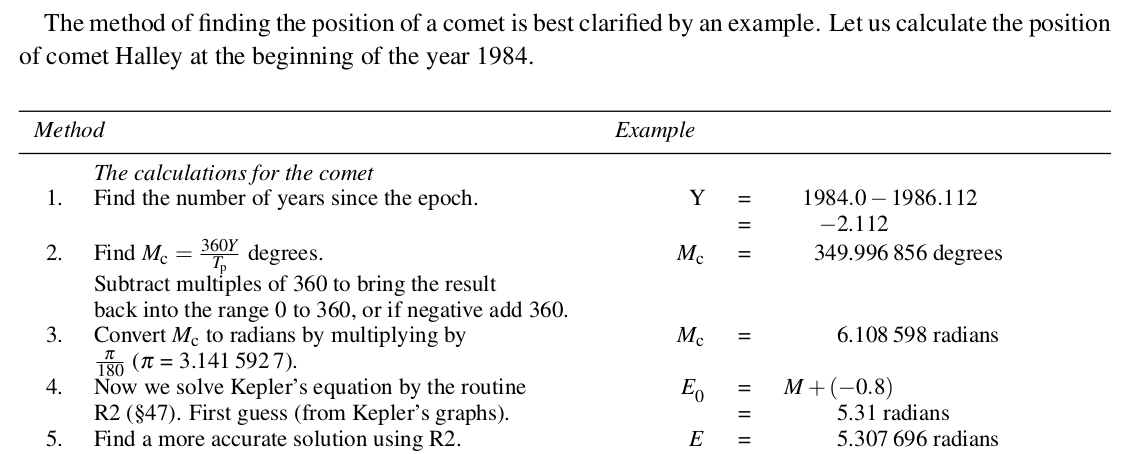

In [ ]:
# Parameters from the book by Duffett-Smith and Zwart
M = 6.108598
E0 = 5.31
e = 0.9673 # eccentricity of the orbit of Halley is given on p. 145

# Solve Kepler's equation  E - e sin(E) - M = 0 

def f(E):
    return E - e*np.sin(E) - M
def fprime(E):
    return 1 - e*np.cos(E)

def newton_demo(f, x0, fprime, max_steps = 5):
    '''Newton's method with a fixed number of steps'''
    x = x0
    for n in range(max_steps):
        x = x - f(x)/fprime(x)
    return x

E = newton_demo(f, E0, fprime)
print(f'newton_demo: {E = }')
    
import scipy.optimize as opt
E = opt.newton(f, E0, fprime)
print(f'opt.newton: {E  = }')


## Example: global behavior of Newton's method

Consider

$$
f(x) = x \exp(- x^2).
$$

The only solution to $f(x) = 0$ is $x = 0$, and $f'(0) = 1$. Hence Newton's method converges starting from an initial guess $x_0$ close enough to the origin. But it does not converge if the initial guess is not good enough. 

In [ ]:
def f(x):
    return x * np.exp(-x**2)

xs = np.linspace(-4, 4)
plt.plot(xs, f(xs)); 

x0 = 1
plt.plot([x0, x0], [-0.5, 0.5], 'r');


In [ ]:
def fprime(x):
    return (1 - 2*x**2) * np.exp(-x**2)

x = newton_demo(f, x0, fprime, max_steps=100)
print(f'{x0 = }, {x = }')

## Example: fast inverse square root

3D computer graphics require massive number of computations and in particular simulating realistic lighting requires computing angles of incidence between incoming ray $\vec{r}$ and surface $\vec{s}$. Their angle $\theta$ is given by
$$ \cos(\theta) = \frac{\vec{r}}{\|\vec{r}\|} \cdot \frac{\vec{s}}{\|\vec{s}\|}. $$
The products and sums are fast to compute but the normalization requires computing the inverse square root: $f(y) = \frac{1}{\sqrt{y}}$ as fast and efficiently as possible. Here $y = r_1^2 + r_2^2 + r_3^2 = \|\vec{r}\|^2$.

A famous piece of computer graphics history is this function used at least in the 1999 video game [Quake III](https://en.wikipedia.org/wiki/Quake_III_Arena). This implementation is by [Greg Walsh](https://www.beyond3d.com/content/articles/15/) but the method was already known in [1986](https://www.netlib.org/fdlibm/e_sqrt.c).

```
float q_rsqrt(float number)
{
  long i;
  float x2, y;
  const float threehalfs = 1.5F;

  x2 = number * 0.5F;
  y  = number;
  i  = * ( long * ) &y;                       // evil floating point bit level hacking
  i  = 0x5f3759df - ( i >> 1 );               // what the fuck?
  y  = * ( float * ) &i;
  y  = y * ( threehalfs - ( x2 * y * y ) );   // 1st iteration
  // y  = y * ( threehalfs - ( x2 * y * y ) );   // 2nd iteration, this can be removed

  return y;
}
```

The integer `i` is obtained by directly setting the floating point number `number` into an integer. Since floats are stored in binary, this is approximately same as taking base-2 logarithm. The second line with a funny comment contains a bit shift `>>` (corresponding to division by 2) and a constant. Alltogether this gives the approximation
$$ i \approx c - \frac{1}{2} \log_2(x). $$
`y` is then set back to a float (same as taking the base-2 exponent) and a single iterative step is taken:
$$y_1 = y_0 \left( \frac{3}{2} - \frac{x}{2} y_0^2  \right), \ \text{where} \ y_0 = 2^i. $$

If we apply the Newton's method for $\phi(y) = \frac{1}{y^2} - x$ (for which the root is obtained when $y = 1/\sqrt{x}$) we get
$$ y_{n+1} = y_n - \frac{y_n^{-2} - x}{-2/y_n^3} = y_n + \frac{1}{2}\left( y_n - x y_n^3 \right) = y_n \left( \frac{3}{2} - \frac{x}{2} y_n^2 \right). $$

So the "evil" bit hacking gives us the initial guess $y_0 = 2^{i} \approx \frac{2^c}{\sqrt{x}},$ where the _magic number_ $c \ (\approx 0.0430357)$ is a parameter used for tuning the approximation. This initial guess is then made better by the Newton's method step. Most importantly all variables are only used in multiplication and addition, and thanks to the good initial guess, a single iteration gives satisfying results. This made it a really fast approximation (at the time).

Check out the [Wikipedia article](https://en.wikipedia.org/wiki/Fast_inverse_square_root) and in particular this [excellent video](https://www.youtube.com/watch?v=p8u_k2LIZyo) which goes more into detail about the bit shifting step and the choice of the constant $c$.

Note that modern computers have faster and even more accurate methods for computing inverse square roots.

# On the optimization sub-package of SciPy

We have already seen [newton](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html), the implementation of Newton's method in SciPy. Calling `newton` without giving the derivative makes SciPy to use the secant method, described in Section 1.5 of [the book](#thebook). The bisection method is given by [bisect](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html) and it is described in Section 1.6 of [the book](#thebook).

Most of the methods in the optimization sub-package are outside the scope of this course. Some of them are described in the optimization course at UH. For more information on the sub-package see the [tutorial](https://docs.scipy.org/doc/scipy/tutorial/optimize.html).

In [ ]:
# Compare Newton, secant and bisection
def f(x):
    return np.exp(x) - x - 2
def fprime(x):
    return np.exp(x) - 1
x0, x1 = 1, 3

x, rres = opt.newton(f, x0, fprime, full_output=True) 
print(f"     Newton's method converged to {x} in {rres.iterations} steps")
x, rres = opt.newton(f, x0, x1=x1, full_output=True) 
print(f'   The secant method converged to {x} in {rres.iterations} steps')
x, rres = opt.bisect(f, x0, x1, full_output=True) 
print(f"The bisection method converged to {x} in {rres.iterations} steps")